# 1. Importing Libraries and Dataset

In [1]:
# Importing Libraries for ML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# Importing Data

df = pd.read_csv('car_data.csv')
df.head(3)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


# 2 Data Preprocessing

In [2]:
df.shape

(301, 9)

In [3]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### As Model would not understand car name better as compare to numerical data hence we drop that data.

In [4]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
df = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


### To convert year as feature which impacts car price in inverse manner we find out the "Age" column which gives us age of car.

In [6]:
from datetime import date

current_year = date.today().year

df["Current_year"] = current_year

df["Age"] = df["Current_year"]-df["Year"]

df.drop(["Year", "Current_year"], axis=1, inplace=True)

df.head(3)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4


###  OneHotEncoding for categorical features 
We use get_dummies() feature which utomatical converts all the categorical features to Encoded data.

Use drop_first = True for dummy variable trap.

In [7]:
print(df["Seller_Type"].unique())
print(df["Transmission"].unique())
print(df["Owner"].unique())
print(df["Fuel_Type"].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [8]:
df = pd.get_dummies(df, drop_first=True)
df.head(3)

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1


### Finding the Correlation between the features

- Here Green says high correlation and Red as low correlation 
- Features which are highely correlated with other features except Target are playing similar role and one them can be dropped.

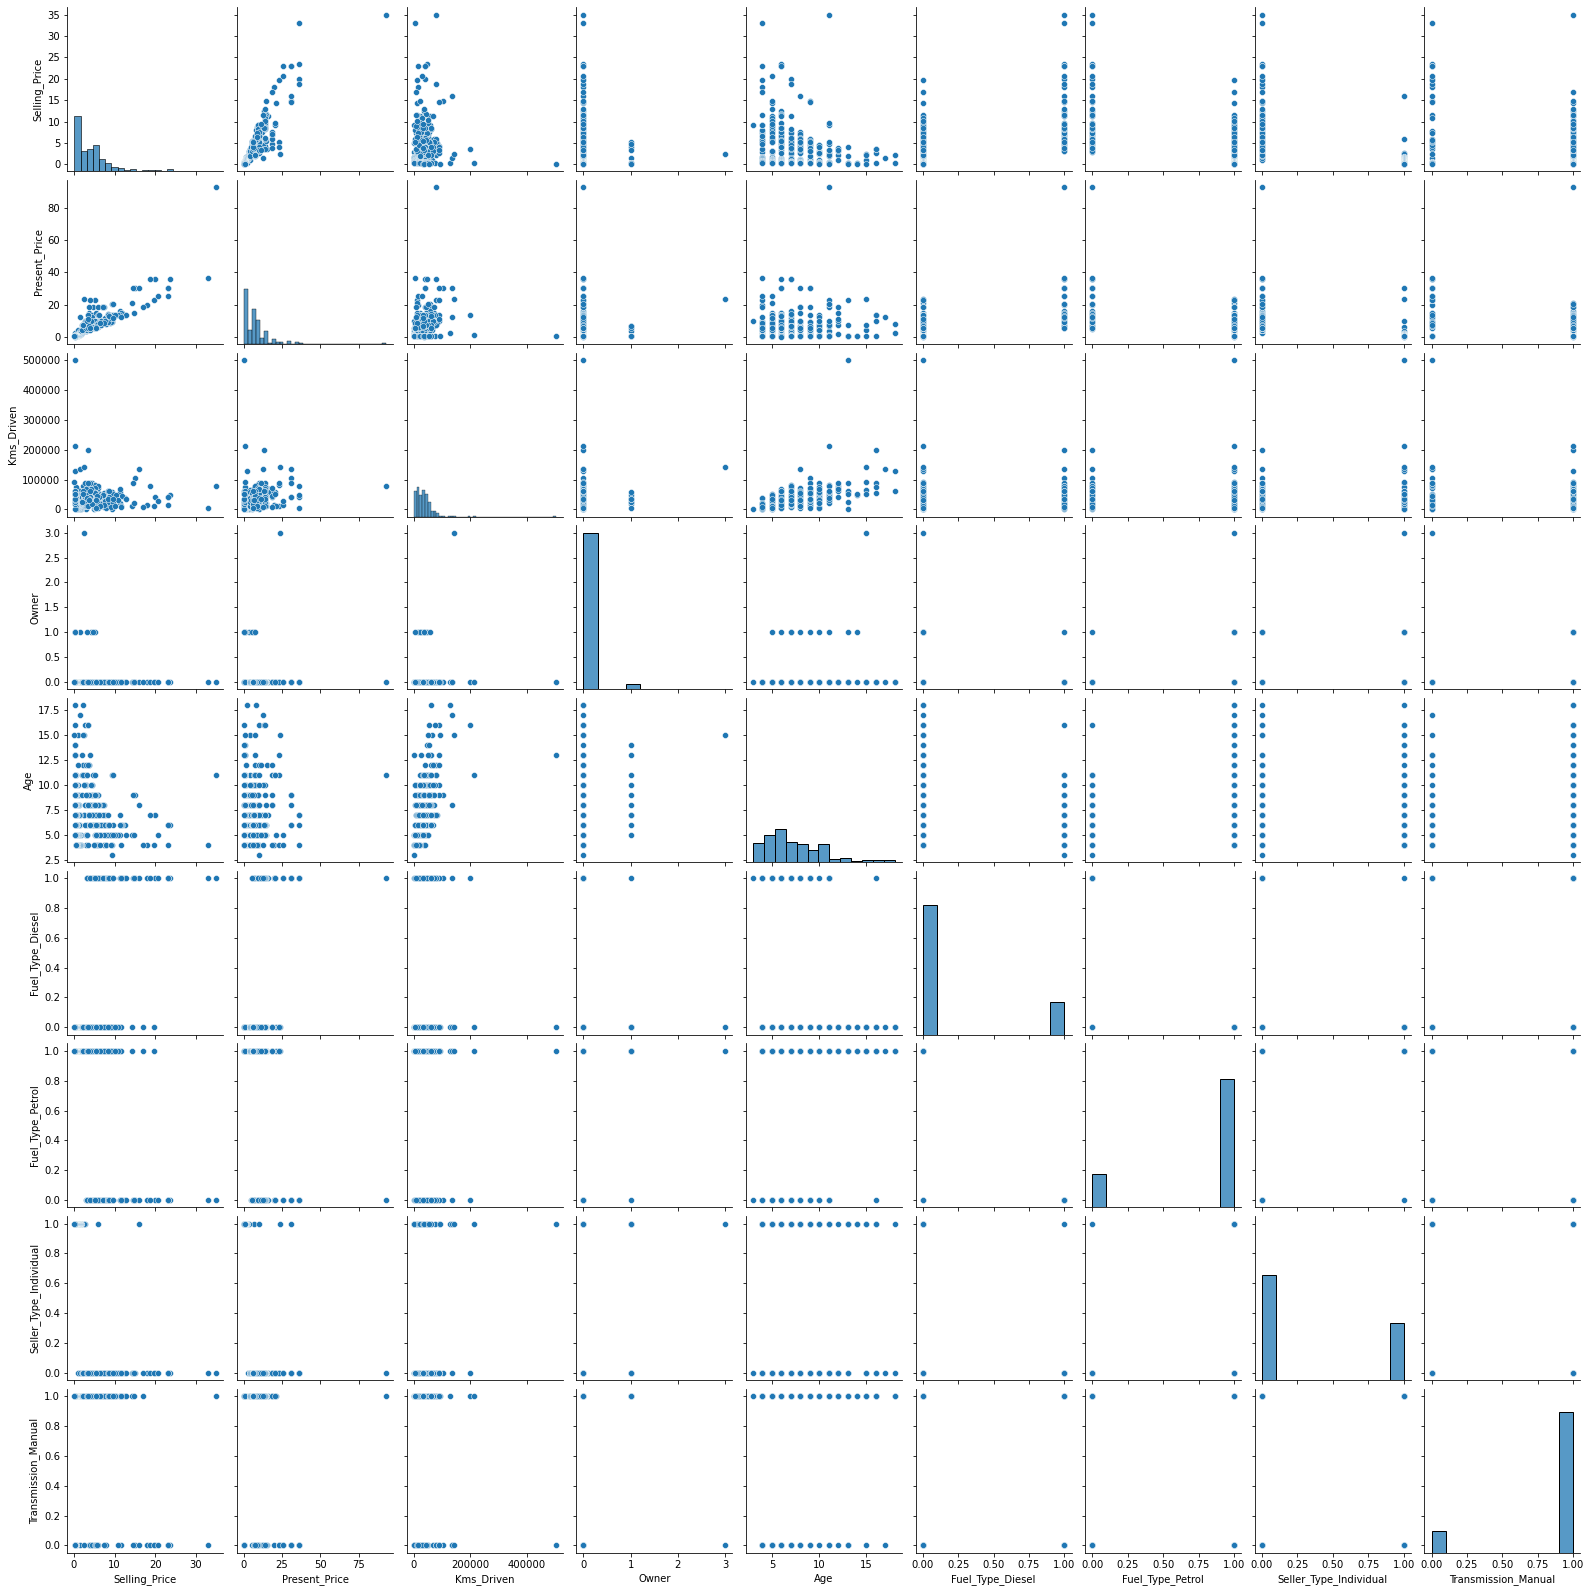

In [9]:
sns.pairplot(df)

<AxesSubplot:>

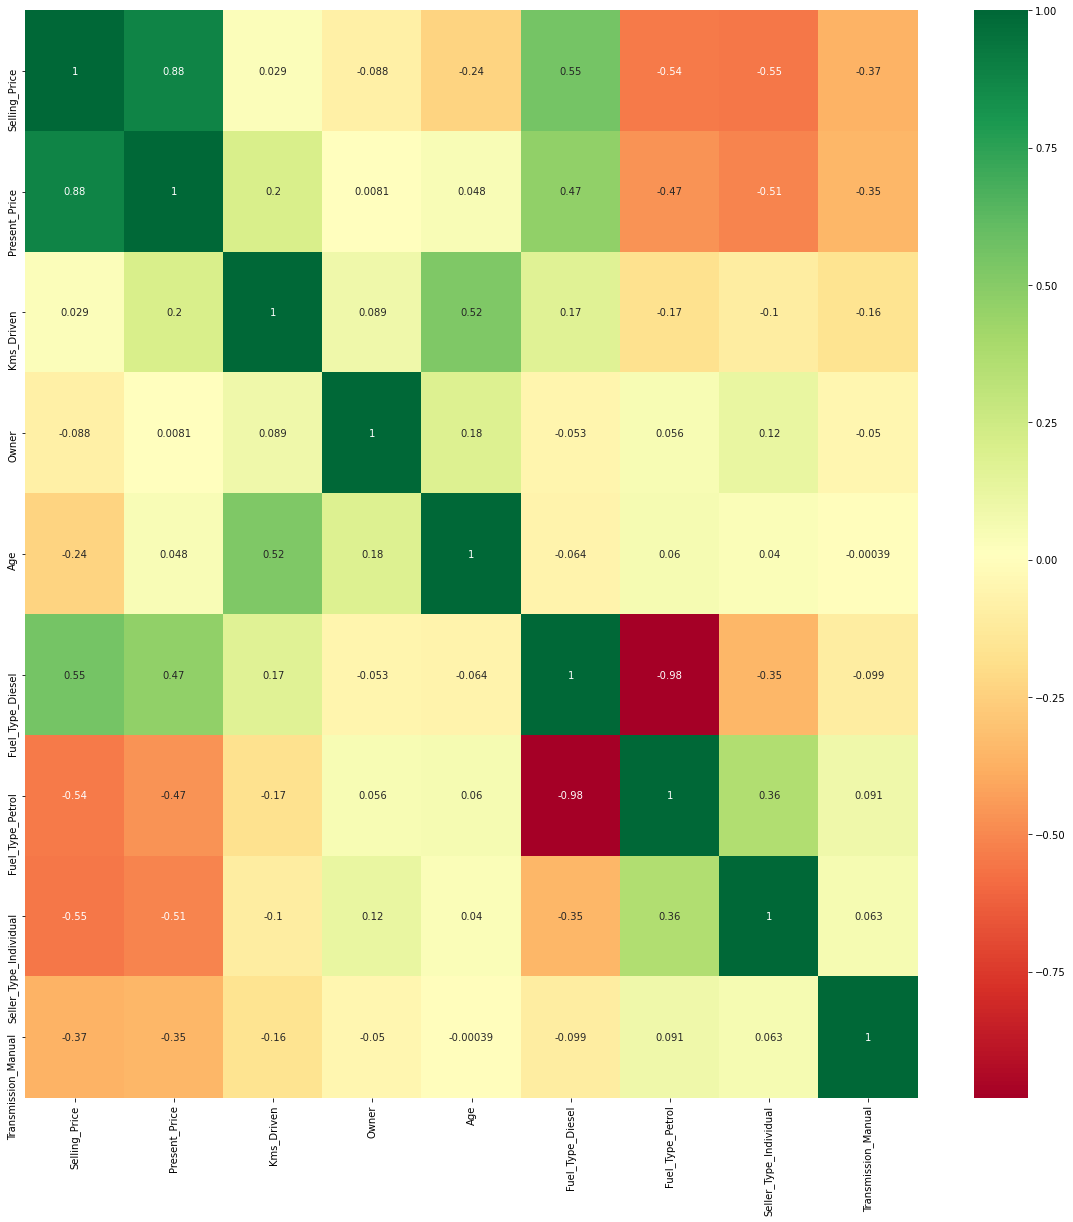

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

#### No features are highly correlated with other hence we can keep it as it is.

### Feature Selection using ExtraTreesRegressor() 
We find out which features are highly important and which are not so important, here Owner feature is showig least importance hence we drop it.

<AxesSubplot:>

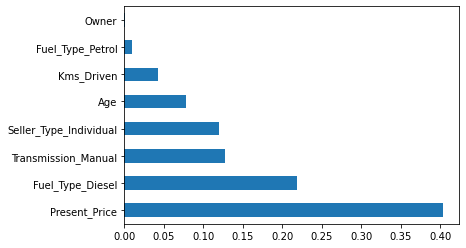

In [11]:
from sklearn.ensemble import ExtraTreesRegressor
x = df.iloc[:,1:]
y = df.iloc[:,0]

model=ExtraTreesRegressor()

model.fit(x,y)

feature_scores_df = pd.Series(model.feature_importances_, index=x.columns)
feature_scores_df = feature_scores_df.sort_values(ascending=False)
feature_scores_df.plot(kind="barh")

In [12]:
feature_scores_df

Present_Price             0.403804
Fuel_Type_Diesel          0.219268
Transmission_Manual       0.127013
Seller_Type_Individual    0.119556
Age                       0.077988
Kms_Driven                0.042329
Fuel_Type_Petrol          0.009680
Owner                     0.000362
dtype: float64

#### Here We can Drop Owner feature as it is not playing much role 

In [13]:
df.drop(["Owner"], axis=1, inplace=True)

----------------------------------------------------

---------------------------------------------------
# 2. Splitting Data into (Features, Target) and (Train, Test) 

In [14]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

------------------------------------------------------------
------------------------------------------------------------
# 3. Random Forest Regressor model for Regression

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

### Hyperparameter Tuning

First we perform RandomizedSearchCV and then Based on output of RandomizedSearchCV we perform GridSearchCV

In [16]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#### Parameter grid for RandomizedSearchCV

In [17]:
para_grid = {'max_depth':  [int(x) for x in np.linspace(5,30,num=6)],
             'max_features': ['auto', 'sqrt','log2', None],
             'min_samples_leaf': [1, 2, 5, 10],
             'min_samples_split' : [2, 5, 10, 15, 100],
             'n_estimators' : [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
            }
para_grid

{'max_depth': [5, 10, 15, 20, 25, 30],
 'max_features': ['auto', 'sqrt', 'log2', None],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [2, 5, 10, 15, 100],
 'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200]}

#### RandomizedSearchCV

In [18]:
rf = RandomForestRegressor()
rf_cv = RandomizedSearchCV(estimator=rf, param_distributions=para_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42)
rf_cv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=   0.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=100, n_estimators=30

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [19]:
para = rf_cv.best_params_
para

{'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': None,
 'max_depth': 5}

#### Parameter grid for GridSearchCV

In [20]:
param_grid = {
    
    'max_depth': [para['max_depth']],
    
    'max_features': [None],
    
    'min_samples_leaf': [para['min_samples_leaf'], 
                         para['min_samples_leaf']+2, 
                         para['min_samples_leaf'] + 4],
    
    'min_samples_split': [para['min_samples_split'] - 2,
                          para['min_samples_split'] - 1,
                          para['min_samples_split'], 
                          para['min_samples_split'] +1,
                          para['min_samples_split'] + 2],
    
    'n_estimators': [para['n_estimators'] - 200,
                     para['n_estimators'] - 100, 
                     para['n_estimators'], 
                     para['n_estimators'] + 100, 
                     para['n_estimators'] + 200]
}
print(param_grid)

{'max_depth': [5], 'max_features': [None], 'min_samples_leaf': [5, 7, 9], 'min_samples_split': [3, 4, 5, 6, 7], 'n_estimators': [700, 800, 900, 1000, 1100]}


#### GridSearchCv

In [ ]:
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error',  cv=5, verbose=2)
rf_cv.fit(x_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=700; total time=   1.4s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=700; total time=   1.2s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=700; total time=   1.2s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=700; total time=   1.2s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=700; total time=   1.4s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   1.7s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   1.5s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total

[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=   2.7s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=1100; total time=   2.6s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=1100; total time=   3.1s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=1100; total time=   2.8s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=1100; total time=   2.8s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=1100; total time=   2.9s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=700; total time=   1.7s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=700; total time=   1.2s
[CV] END max_depth=5, max_features=None, m

### Fitting Model on best hyperparameters

In [ ]:
para = rf_cv.best_params_

rf_final = RandomForestRegressor(n_estimators = para["n_estimators"],
                                 min_samples_split = para["min_samples_split"],
                                 min_samples_leaf = para["min_samples_leaf"],
                                 max_features = None,
                                 max_depth = para["max_depth"])
rf_final.fit(x_train, y_train)

y_pred = rf_final.predict(x_test)

rf_final.score(x_test, y_test)

In [ ]:
plt.scatter(y_test, y_pred)

# Exporting Pickle File

In [ ]:
import pickle 

file = open("random_forest_regression_model.pkl", "wb")

pickle.dump(rf_final, file)

In [ ]:
x
